# Time Series Forescasting

In [1]:
import pandas as pd
from pandas import datetime
import matplotlib.pyplot as plt

In [2]:
def parser(x):
    return datetime.strptime(x,'%Y-%m')

sales = pd.read_csv('monthlyCarSalesData.csv',index_col=0, parse_dates=[0] ,date_parser=parser)

In [3]:
sales.head()

,Sales
Month,
1960-01-01,6550
1960-02-01,8728
1960-03-01,12026
1960-04-01,14395
1960-05-01,14587


In [6]:
sales.head(2)

,Sales
Month,
1960-01-01,6550
1960-02-01,8728


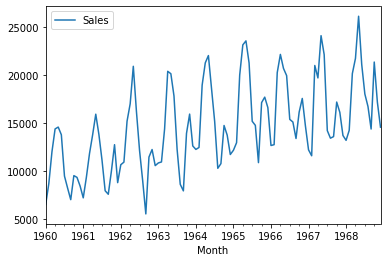

In [7]:
sales.plot()

Stationary means mean, variance and covariance is constant over periods.

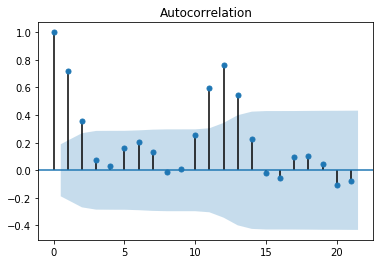

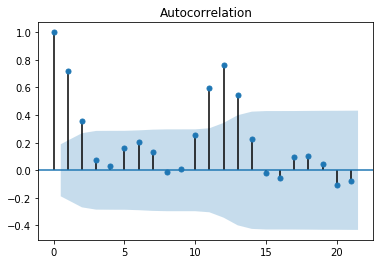

In [8]:
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(sales)

### Converting series to stationary

In [9]:
sales.head()

,Sales
Month,
1960-01-01,6550
1960-02-01,8728
1960-03-01,12026
1960-04-01,14395
1960-05-01,14587


In [10]:
sales.shift(1)

,Sales
Month,
1960-01-01,NaN
1960-02-01,6550.0
1960-03-01,8728.0
1960-04-01,12026.0
1960-05-01,14395.0
1960-06-01,14587.0
1960-07-01,13791.0
1960-08-01,9498.0
1960-09-01,8251.0


In [11]:
sales_diff = sales.diff(periods=1)
# integrated of order 1, denoted by d (for diff), one of the parameter of ARIMA model


In [12]:
sales_diff = sales_diff[1:]
sales_diff.head()

,Sales
Month,
1960-02-01,2178.0
1960-03-01,3298.0
1960-04-01,2369.0
1960-05-01,192.0
1960-06-01,-796.0


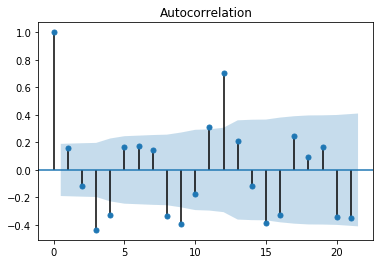

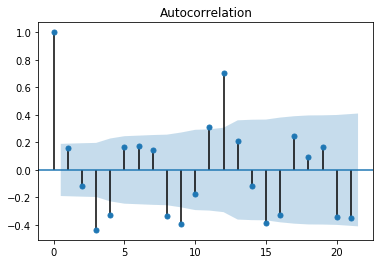

In [13]:
plot_acf(sales_diff)

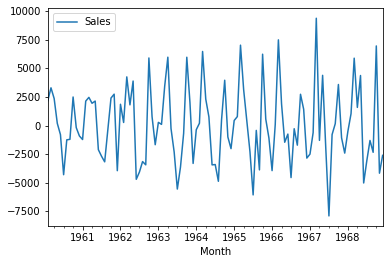

In [14]:
sales_diff.plot()

In [15]:
X = sales.values
train = X[0:87] # 27 data as train data
test = X[86:]  # 9 data as test data
predictions = []

In [16]:
train.size

87

# Autoreggresive AR Model

In [18]:
from statsmodels.tsa.ar_model import AR
from sklearn.metrics import mean_squared_error
model_ar = AR(train)
model_ar_fit = model_ar.fit()

In [46]:
predictions = model_ar_fit.predict(start=86,end=108)

In [47]:
print(test[:5])
print(predictions[:5])

[[20985]
 [19692]
 [24081]
 [22114]
 [14220]]
[19349.16189031 22906.5281363  22739.28370522 19516.27832855
 15964.99712183]


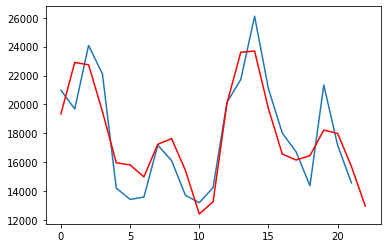

In [48]:
plt.plot(test)
plt.plot(predictions,color='red')

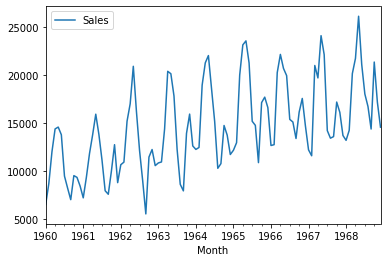

In [49]:
sales.plot()

# ARIMA model

In [50]:
from statsmodels.tsa.arima_model import ARIMA

In [71]:
#p,d,q  p = periods taken for autoregressive model
#d -> Integrated order, difference
# q periods in moving average model
model_arima = ARIMA(train,order=(11, 1, 1))
model_arima_fit = model_arima.fit()
print(model_arima_fit.aic)

1546.2561655092688


In [72]:
predictions= model_arima_fit.forecast(steps=22)[0]
predictions

array([23007.90803753, 23039.36668551, 20038.40267876, 16346.87964528,
       16288.3460877 , 15230.17830934, 17712.67268671, 18128.81697307,
       15828.00478812, 12824.28703412, 13625.0768693 , 20786.57220594,
       24014.74734481, 24454.99714825, 20576.69173894, 17524.73329865,
       17154.77547902, 17089.88785783, 19207.03313847, 18956.9848633 ,
       16661.44302816, 13792.69872174])

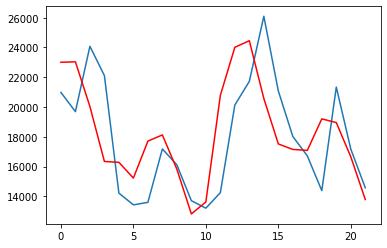

In [73]:
plt.plot(test)
plt.plot(predictions,color='red')

In [74]:
mean_squared_error(test,predictions)

10469792.209095512

In [75]:
mse = ((predictions - test) ** 2).mean()
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 2)))

The Mean Squared Error of our forecasts is 24881232.5


In [65]:
import itertools
p=d=q=range(0,12)
pdq = list(itertools.product(p,d,q))
pdq

[(0, 0, 0),
 (0, 0, 1),
 (0, 0, 2),
 (0, 0, 3),
 (0, 0, 4),
 (0, 0, 5),
 (0, 0, 6),
 (0, 0, 7),
 (0, 0, 8),
 (0, 0, 9),
 (0, 0, 10),
 (0, 0, 11),
 (0, 1, 0),
 (0, 1, 1),
 (0, 1, 2),
 (0, 1, 3),
 (0, 1, 4),
 (0, 1, 5),
 (0, 1, 6),
 (0, 1, 7),
 (0, 1, 8),
 (0, 1, 9),
 (0, 1, 10),
 (0, 1, 11),
 (0, 2, 0),
 (0, 2, 1),
 (0, 2, 2),
 (0, 2, 3),
 (0, 2, 4),
 (0, 2, 5),
 (0, 2, 6),
 (0, 2, 7),
 (0, 2, 8),
 (0, 2, 9),
 (0, 2, 10),
 (0, 2, 11),
 (0, 3, 0),
 (0, 3, 1),
 (0, 3, 2),
 (0, 3, 3),
 (0, 3, 4),
 (0, 3, 5),
 (0, 3, 6),
 (0, 3, 7),
 (0, 3, 8),
 (0, 3, 9),
 (0, 3, 10),
 (0, 3, 11),
 (0, 4, 0),
 (0, 4, 1),
 (0, 4, 2),
 (0, 4, 3),
 (0, 4, 4),
 (0, 4, 5),
 (0, 4, 6),
 (0, 4, 7),
 (0, 4, 8),
 (0, 4, 9),
 (0, 4, 10),
 (0, 4, 11),
 (0, 5, 0),
 (0, 5, 1),
 (0, 5, 2),
 (0, 5, 3),
 (0, 5, 4),
 (0, 5, 5),
 (0, 5, 6),
 (0, 5, 7),
 (0, 5, 8),
 (0, 5, 9),
 (0, 5, 10),
 (0, 5, 11),
 (0, 6, 0),
 (0, 6, 1),
 (0, 6, 2),
 (0, 6, 3),
 (0, 6, 4),
 (0, 6, 5),
 (0, 6, 6),
 (0, 6, 7),
 (0, 6, 8),
 (0, 6, 9),
 (0,

In [66]:
import warnings
warnings.filterwarnings('ignore')
for param in pdq:
    try:
        model_arima = ARIMA(train,order=param)
        model_arima_fit = model_arima.fit()
        print(param,model_arima_fit.aic)
    except:
        continue
    

(0, 0, 0) 1707.7410746106327
(0, 0, 1) 1656.9221203760922
(0, 0, 4) 1625.1960276419115
(0, 0, 5) 1626.9761174766627
(0, 0, 6) 1628.9367100510997
(0, 0, 7) 1624.9987384923222
(0, 0, 8) 1625.3996887773458
(0, 1, 0) 1637.4556105567558
(0, 1, 1) 1633.6868383033216
(0, 1, 2) 1633.03730818927
(0, 1, 3) 1608.1289089528316
(0, 1, 4) 1601.6987829718396
(0, 1, 5) 1597.7236100895777
(0, 1, 6) 1590.9153118580384
(0, 1, 7) 1589.9880732952852
(0, 2, 0) 1651.1888335862845
(0, 2, 1) 1625.9104023507275
(0, 2, 2) 1621.729841831926
(0, 2, 3) 1620.3320764805321
(1, 0, 0) 1647.8662274631026
(1, 0, 1) 1639.3104832357658
(1, 0, 2) 1630.5107641780187
(1, 0, 3) 1625.3352898667129
(1, 0, 4) 1634.0330153055006
(1, 0, 5) 1638.5283663756331
(1, 0, 6) 1641.9278219928328
(1, 0, 9) 1625.0854411730213
(1, 0, 11) 1616.1716014255007
(1, 1, 0) 1634.5955169794872
(1, 1, 2) 1616.7998961968185
(1, 1, 3) 1607.8689504601205
(1, 1, 4) 1602.135909983248
(1, 1, 7) 1593.6715258923412
(1, 1, 9) 1591.3345217815852
(1, 2, 0) 1649.01

In [2]:
#  https://www.youtube.com/watch?v=D9y6dcy0xK8
#  demo video for this example